In [81]:
#Laod current hamiltonian file
using LinearAlgebra, Plots, Graphs
include("../src/graphs.jl")
include("../src/observables.jl")

"function energy_resolution(energies; boundaries, nbins=10)\n    min_energy, max_energy = boundaries\n    bin_size = (max_energy-min_energy)/(nbins-2)\n    bins = []\n\n\n\nend\n"

In [82]:
L = 100 # number of sites
chain_graph = path_graph(L)
add_edge!(chain_graph, 1, L)
# for e in edges(chain_graph)
#     println(e)
# end

true

In [83]:
# get localization of the ground state as a function of disorder
NUM_DISORDERS = 21
NUM_SAMPLES = 100

disorders = 10 .^ LinRange(-2, 1, NUM_DISORDERS)
iprs = zeros(NUM_DISORDERS)
for (i, disorder) in enumerate(disorders)
    for n in 1:NUM_SAMPLES
        chain_hamiltonian = hamiltonian_from_graph(chain_graph, disorder * rand(L), 1.0) 
        eigval_vec, eigvec_mat  = eigen(chain_hamiltonian)
        iprs[i] += inverse_participation_ratio(eigvec_mat[:, 1])
    end
end


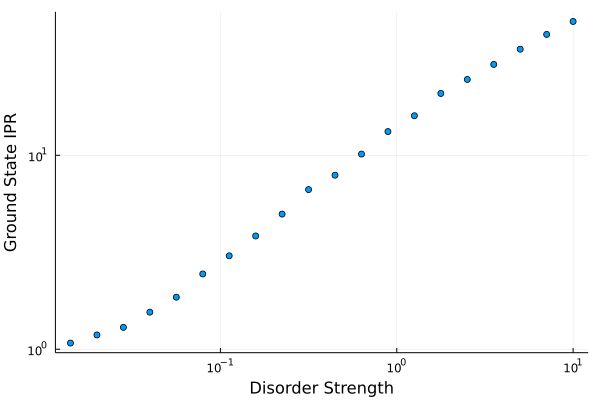

In [90]:
# Look at eigenvector
plot_inst = scatter(disorders[2:end], iprs[2:end];
    scale = :log10,
    label = "",
    xlabel = "Disorder Strength",
    ylabel = "Ground State IPR"
)

plot_inst